In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
import os
from pathlib import Path

In [5]:
# Specify the parent folder paths in a list
folders = [
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-52000',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-52000',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-59000/inference/0',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-54500/inference/0',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-113500/inference/0',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-84500/inference/07-13-11:23',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-145500/inference/07-13-11:25',
    ]

In [18]:
# Define a function to find and extract the score from a score.txt file
def get_scores(folders, filename):
    scores = {}
    for folder_path in folders:
        # Search for score.txt files in the folder and its subdirectories
        score_files = glob.glob(f'{folder_path}/**/{filename}', recursive=True)

        # If no score file is found, raise an exception
        if not score_files:
            raise FileNotFoundError(f'No score.txt file found in {folder_path} or its subdirectories.')

        # If more than one score file is found, raise an exception
        if len(score_files) > 1:
            raise ValueError(f'More than one score.txt file found in {folder_path} or its subdirectories.')

        # Read the score from the score file
        with open(score_files[0], 'r') as file:
            score = float(file.read().strip())  # Change to int if the score is an integer
        scores[folder_path] = score
    return scores

def filter_path(path, keywords):
    parts = path.split(os.sep)
    filtered_parts = []
    for part in parts:
        if any(keyword in part for keyword in keywords):
            filtered_parts.append(part)
        if len(filtered_parts) == len(keywords):
            break
    return os.sep.join(filtered_parts)

def plot_scores(scores_dict, title, reverse=False):
    # Get unique labels
    labels = {path: filter_path(path, keywords=["dataset", "checkpoint"]) for path in scores_dict.keys()}
    unique_labels = list(set(labels.values()))

    # Create a color map
    color_map = plt.colormaps.get_cmap('tab10')  # Choose the color map you like
    colors = color_map(np.linspace(0, 1, len(unique_labels)))

    # Create a dictionary mapping labels to colors
    label_color_dict = {label: color for label, color in zip(unique_labels, colors)}

    # Sort labels and scores in decreasing order by scores
    items = sorted([(label, scores_dict[path]) for path, label in labels.items()], key=lambda x: x[1], reverse=reverse)
    labels, scores = zip(*items)

    # Plot the bars with colors according to their labels
    for i, score in enumerate(scores):
        plt.bar(i, score, color=label_color_dict[labels[i]])

    plt.ylabel('Average Score')
    plt.title(title)

    # Create custom legend
    patches = [mpatches.Patch(color=color, label=label) for label, color in label_color_dict.items()]
    plt.legend(handles=patches)

    plt.xticks([])  # Remove x-axis labels
    # ylims = min(scores) - (min(scores) * 0.025), max(scores) + (max(scores) * 0.025)
    plt.ylim(min(scores) - 0.2, max(scores) + 0.2)  # Add some margin at the top and bottom
    plt.tight_layout()  # Adjust layout so labels aren't cut off
    plt.show()


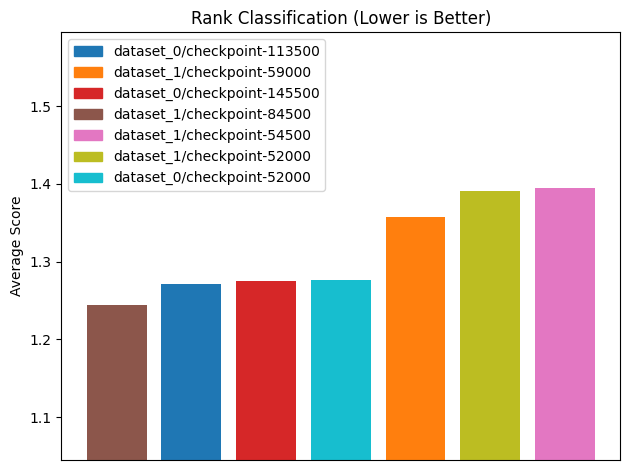

In [19]:
filename_txt = 'ranks.txt'
scores_dict = get_scores(folders, filename_txt)
title = 'Rank Classification (Lower is Better)'
plot_scores(scores_dict, title)

In [ ]:
from scipy.stats import ttest_ind_from_stats

def get_significance(mean_diff, std1, std2, n1, n2):
    # Calculating the means
    mean1 = 0  # assuming mean of first sample is 0
    mean2 = mean_diff  # mean of second sample is difference in mean
  
    # Perform t-test
    t_stat, p_value = ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=n1, 
                                           mean2=mean2, std2=std2, nobs2=n2)

    return p_value



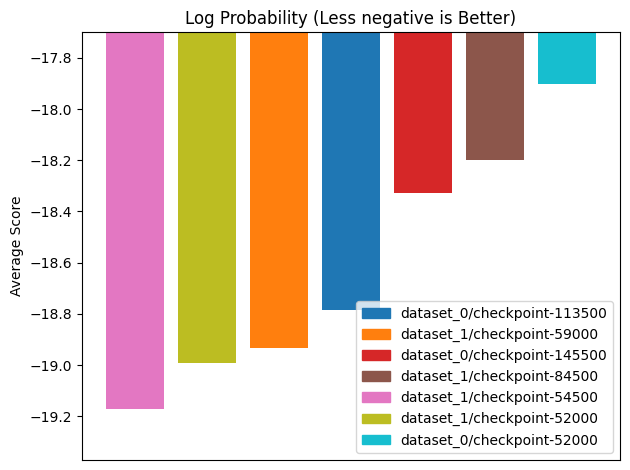

In [20]:
filename_logprob = 'log_probs.txt'
scores_dict = get_scores(folders, filename_logprob)
title = 'Log Probability (Less negative is Better)'
plot_scores(scores_dict, title)